In [14]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import matplotlib.pyplot as plt

<h1><font color='blue'>Load MNIST Dataset</font></h1>

In [2]:
mnist = tf.keras.datasets.fashion_mnist

<h2><font color='blue'>Get Training and Testing Sets</font></h2>

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


<h2><font color='blue'>Printing an image and labels</font></h2>

7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

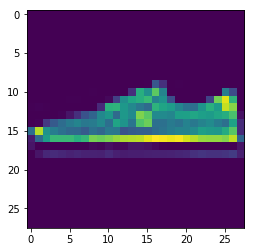

In [8]:
plt.imshow(training_images[14])
print(training_labels[14])
print(training_images[14])

<h2><font color='blue'>Normalizing</font></h2>
<p>As all the values are between 0 and 255, we can normalize the values, putting everything </br>
in terms of values between 1 and 0, dividing all the values by 255</p>

In [10]:
training_images = training_images / 255.0
test_images = test_images / 255.0

<h2><font color='blue'>Creating Model</font></h2>

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

- **Sequential:** defines a SEQUENCE of layers in the neural network
- **Flatten:** Takes the images (a square) and turn them into a 1 dimensional set.
- **Dense:** Adds a layer of neurons, each layer of neurons needs an **activation function** to tell them what to do. 
    - **Relu** effectively means **if X > 0 return X, else return 0**, so what it does it only passes values 0 or greater to the next layer network.
    - **Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0]

In [19]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0865 - acc: 0.9679
Epoch 2/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0872 - acc: 0.9679
Epoch 3/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0836 - acc: 0.9681
Epoch 4/100
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0867 - acc: 0.9677
Epoch 5/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0815 - acc: 0.9694
Epoch 6/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0816 - acc: 0.9696
Epoch 7/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0825 - acc: 0.9697
Epoch 8/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0806 - acc: 0.9701
Epoch 9/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0790 - acc: 0.9703
Epoch 10/100
60000/60000 [==============================] - 4s 65us/sampl

In [20]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 38us/sample - loss: 1.1161 - acc: 0.8810


[1.1160549316072021, 0.881]

<h2><font color='green'>Exploration Exercises</font></h2>

<p>adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate.</p>

In [23]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[6.8790658e-21 0.0000000e+00 9.0761132e-31 0.0000000e+00 0.0000000e+00
 4.7847071e-17 0.0000000e+00 2.1176593e-14 1.1832438e-28 1.0000000e+00]
9


The predictions represents the probability for the item to be classified as each one of the 10 possible labels.

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 11s 191us/sample - loss: 0.4720
Epoch 2/100
60000/60000 [==============================] - 12s 199us/sample - loss: 0.3577
Epoch 3/100
60000/60000 [==============================] - 11s 184us/sample - loss: 0.3220
Epoch 4/100
60000/60000 [==============================] - 12s 195us/sample - loss: 0.2975
Epoch 5/100
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2787
Epoch 6/100
60000/60000 [==============================] - 12s 199us/sample - loss: 0.2627
Epoch 7/100
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2505
Epoch 8/100
60000/60000 [==============================] - 13s 217us/sample - loss: 0.2384
Epoch 9/100
60000/60000 [==============================] - 15s 247us/sample - loss: 0.2282
Epoch 10/100
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2207
Epoch 11/100
60000/60000 [==============================] - 12s 201us/sample - loss: 0.21

0.9328931479603052

In [26]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.9329


0.9328931479603052

In [27]:
classification = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[6.8790658e-21 0.0000000e+00 9.0761132e-31 0.0000000e+00 0.0000000e+00
 4.7847071e-17 0.0000000e+00 2.1176593e-14 1.1832438e-28 1.0000000e+00]
9


<h3><font color='green'>Removing the Flatten layer</font></h3>

<p><font color='red'>InvalidArgumentError: logits and labels must have the same first dimension, got logits shape [896,10] and labels shape [32]
	 [[{{node loss_5/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]</font></p>
     
<p>You get an error about the shape of the data, this reinforces the rule of the thumb, that <b>the first layer in the network should be the same shape as your data.</b></p>
 
<p>Right now our data is <b>28x28</b> images, and 28 layers of 28 neurons would be <b>infeasible</b>, so it makes more sense to 'flatten' that 28,28 into a <b>784x1</b>.</p> 

In [28]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=100)

Epoch 1/100


InvalidArgumentError: logits and labels must have the same first dimension, got logits shape [896,10] and labels shape [32]
	 [[{{node loss_5/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]

<h3><font color='green'>Final (output) Layers</font></h3>

<p>Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for.</p>

<p>In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.</p>

<h1><font color='blue'>Callbacks</font></h1>

<p> A <b>callback</b> is a function that can be invoked in the process of modle training (<b>fit</b>), say you reach the desired <b>loss</b> on the 30th <b>epoch</b> but you setted 100 <b>epochs</b>, you can call a function to terminate the training.

In [43]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.84):
            print('\nReached 90% accuracy, so cancelling the training!')
            self.model.stop_training = True

In [37]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
callback = myCallback()

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, callbacks=[callback])

Epoch 1/20
60000/60000 [==============================] - 7s 120us/sample - loss: 3.9945 - acc: 0.7528
Epoch 2/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5656 - acc: 0.7977
Epoch 3/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5307 - acc: 0.8157
Epoch 4/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.5175 - acc: 0.8214
Epoch 5/20
60000/60000 [==============================] - 9s 151us/sample - loss: 0.5014 - acc: 0.8271
Epoch 6/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4955 - acc: 0.8314
Epoch 7/20
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4798 - acc: 0.8351
Epoch 8/20
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4766 - acc: 0.8381
Epoch 9/20
59648/60000 [============================>.] - ETA: 0s - loss: 0.4597 - acc: 0.8415
Reached 90% accuracy, so cancelling the training!
60000/60000 [==================

<h1><font color='blue'>Exercise 2 - Handwriting Digits</font></h1>

In [46]:
import warnings 
warnings.filterwarnings('ignore')

import tensorflow as tf

In [64]:
class accuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') >=0.99):
            print('\nReached 99% accuracy so cancelling training!')
            self.model.stop_training = True

In [65]:
callback = accuracyCallback()

In [49]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [59]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train, epochs=5, callbacks=[callback])

Epoch 1/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2002 - acc: 0.9406
Epoch 2/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0792 - acc: 0.9753
Epoch 3/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0527 - acc: 0.9833
Epoch 4/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0358 - acc: 0.9878
Epoch 5/5
59584/60000 [============================>.] - ETA: 0s - loss: 0.0255 - acc: 0.9920
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0254 - acc: 0.9920
